In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
%matplotlib inline
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
home_dir = '/content/drive/My Drive/Genetic Engineering Attribution Challenge/'

data_dir = home_dir + 'data/'
prepr_dir = home_dir + 'preprocessed/'

train_values = pd.read_csv(data_dir + 'train_values.csv', index_col='sequence_id')
train_values = train_values.sample(frac=1, random_state=0)

test_values = pd.read_csv(data_dir + 'test_values.csv', index_col='sequence_id')

In [ ]:
train_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,growth_strain_dh5alpha,growth_strain_neb_stable,growth_strain_other,growth_strain_stbl3,growth_strain_top10,growth_strain_xl1_blue,growth_temp_30,growth_temp_37,growth_temp_other,selectable_markers_blasticidin,selectable_markers_his3,selectable_markers_hygromycin,selectable_markers_leu2,selectable_markers_neomycin,selectable_markers_other,selectable_markers_puromycin,selectable_markers_trp1,selectable_markers_ura3,selectable_markers_zeocin,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZAUCS,GTCCGCTGCTGCGTAGCGCGCTGCCGGCTGGCTGGTTTATTGCGGA...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
XRHE8,CGTCTCATGGCCTGACCCCGGACCAAGTGGTGGCTATCGAGACCGG...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0M374,GGCCTAAAAGCGTAGTGGGAAAGTGACGTGAAATTCGTCCAGATTA...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E0YEX,TTCTTGAAGACGAAAGGGCCTCGTGATACGCCTATTTTTATAGGTT...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
05KHP,CAACAGTCCCCCGGCCACGGGGCCTGCCACCATACCCACGCCGAAA...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_values.dtypes

sequence                                 object
bacterial_resistance_ampicillin         float64
bacterial_resistance_chloramphenicol    float64
bacterial_resistance_kanamycin          float64
bacterial_resistance_other              float64
bacterial_resistance_spectinomycin      float64
copy_number_high_copy                   float64
copy_number_low_copy                    float64
copy_number_unknown                     float64
growth_strain_ccdb_survival             float64
growth_strain_dh10b                     float64
growth_strain_dh5alpha                  float64
growth_strain_neb_stable                float64
growth_strain_other                     float64
growth_strain_stbl3                     float64
growth_strain_top10                     float64
growth_strain_xl1_blue                  float64
growth_temp_30                          float64
growth_temp_37                          float64
growth_temp_other                       float64
selectable_markers_blasticidin          

In [ ]:
sequence_lengths = train_values.sequence.apply(len)
sequence_lengths.describe()

count    63017.000000
mean      4839.025501
std       3883.148431
min         20.000000
25%        909.000000
50%       4741.000000
75%       7490.000000
max      60099.000000
Name: sequence, dtype: float64

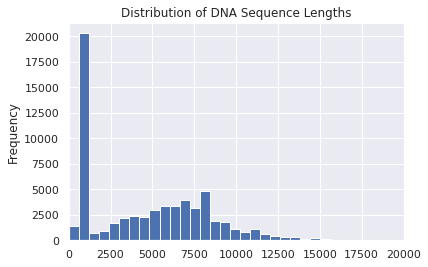

In [ ]:
sequence_lengths.plot(
    kind='hist', 
    title='Distribution of DNA Sequence Lengths', 
    bins=100,
    xlim=(0, 20000));  # don't plot super long sequences

In [ ]:
# exclude the 0th column which is the dna sequence
train_values.iloc[:, 1:].apply(pd.value_counts)

,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,growth_strain_dh5alpha,growth_strain_neb_stable,growth_strain_other,growth_strain_stbl3,growth_strain_top10,growth_strain_xl1_blue,growth_temp_30,growth_temp_37,growth_temp_other,selectable_markers_blasticidin,selectable_markers_his3,selectable_markers_hygromycin,selectable_markers_leu2,selectable_markers_neomycin,selectable_markers_other,selectable_markers_puromycin,selectable_markers_trp1,selectable_markers_ura3,selectable_markers_zeocin,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0.0,19590,60506,48706,62078,58592,18750,57313,50059,61841,61285,17440,58004,60436,60647,60331,61216,61148,1985,62989,62387,62679,61237,62574,54069,60835,56600,62585,62160,62458,61417,61478,36890,57732,61978,62322,56381,61949,55170,61742
1.0,43427,2511,14311,939,4425,44267,5704,12958,1176,1732,45577,5013,2581,2370,2686,1801,1869,61032,28,630,338,1780,443,8948,2182,6417,432,857,559,1600,1539,26127,5285,1039,695,6636,1068,7847,1275


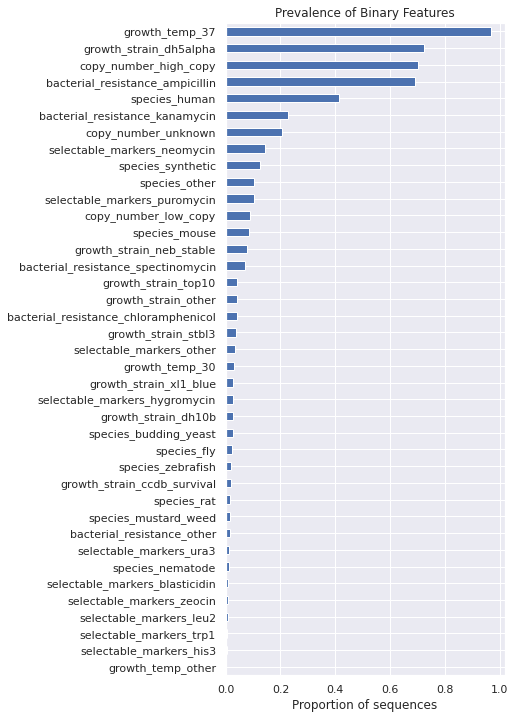

In [ ]:
sorted_binary_features = train_values.iloc[:, 1:].mean().sort_values()

ax = sorted_binary_features.plot(kind='barh',
                                 stacked=True,
                                 figsize=(5, 12),
                                 title='Prevalence of Binary Features')
ax.set_xlabel('Proportion of sequences');

In [ ]:
test_values.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,growth_strain_dh5alpha,growth_strain_neb_stable,growth_strain_other,growth_strain_stbl3,growth_strain_top10,growth_strain_xl1_blue,growth_temp_30,growth_temp_37,growth_temp_other,selectable_markers_blasticidin,selectable_markers_his3,selectable_markers_hygromycin,selectable_markers_leu2,selectable_markers_neomycin,selectable_markers_other,selectable_markers_puromycin,selectable_markers_trp1,selectable_markers_ura3,selectable_markers_zeocin,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E0VFT,AGATCTATACATTGAATCAATATTGGCAATTAGCCATATTAGTCAT...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTRK5,GCGCGCGTTGACATTGATTATTGACTAGTTATTAATAGTAATCAAT...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,GCTTAAGCGGTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTG...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,ATGATGATGATGTCCCTGAACAGCAAGCAGGCGTTTAGCATGCCGC...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,GGTACCGAGCTCTTACGCGTGCTAGCCATACTATCAGCCACTTGTG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_values.sequence.apply(len).describe()

count    18816.000000
mean      4875.523810
std       4004.117614
min         19.000000
25%        894.750000
50%       4732.000000
75%       7341.250000
max      38638.000000
Name: sequence, dtype: float64

In [ ]:
train_labels = pd.read_csv(data_dir + 'train_labels.csv', index_col='sequence_id')
train_labels = train_labels.sample(frac=1, random_state=0)
train_labels.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,0CML4B5I,0DTHTJLJ,0FFBBVE1,0HWCWFNU,0L3Y6ZB2,0M44GDO8,0MDYJM3H,0N3V9P9M,0NP55E93,0PJ91ZT6,0R296F9R,0T2AZBD6,0URA80CN,0VRP2DI6,0W6O08VX,0WHP4PPK,0XPTGGLP,0XS4FHP3,0Y24J5G2,10TEBWK2,11TTDKTM,131RRHBV,13LZE1F7,14PBN8C2,15D0Z97U,15S88O4Q,18C9J8EH,19CAUKJB,1AP294AT,1B9BJ2IP,...,Z1C99MVU,Z1Y066QU,Z6LWLWFZ,Z7YFK3I0,Z7ZKDLZG,Z80NVAXF,Z8BWVZZX,ZAYLY2YU,ZB6DPIG5,ZB862XHR,ZBQD50GN,ZC07UYVV,ZCU48L3S,ZEAZQ1QQ,ZEB7PDQK,ZEBTRK7D,ZEJOQQJF,ZELU1VMX,ZFBSIW7Q,ZGY1YZ7P,ZH6LR5MO,ZIGUIE0J,ZIJRW95G,ZK6YBV02,ZLSXM0KN,ZMCRIYYJ,ZMEZU4BS,ZMUIMBDX,ZOI7FJEN,ZQ5A6IY9,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZAUCS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XRHE8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0M374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E0YEX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05KHP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# get the column with the max value in each row
lab_ids = pd.DataFrame(train_labels.idxmax(axis=1), columns=['lab_id'])
lab_ids.head()

,lab_id
sequence_id,
ZAUCS,65CCBIXK
XRHE8,3C2VZQ2R
0M374,862RYK1K
E0YEX,HVBBJM37
05KHP,Y4G53L4X


In [ ]:
# get the distrubtion of lab prevalence in the training set
lab_ids['lab_id'].value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
Name: lab_id, dtype: float64

In [ ]:
# Sort lab ids by prevalence
lab_ids_sorted = (lab_ids['lab_id'].value_counts(normalize=True)
                  .sort_values(ascending=False))
lab_ids_sorted.head()

I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

In [ ]:
bases = list(sorted(set(''.join(train_values.sequence.values))))
base_num = len(bases)
bases

['A', 'C', 'G', 'N', 'T']

In [ ]:
real_bases = []

for base in bases:
    if base != 'N':
        real_bases.append(base)

real_bases

['A', 'C', 'G', 'T']

In [ ]:
from itertools import product

# N-gram index
n_index = 6

# Get permutations with repetitions
def get_subsequences(n):
    return sorted([''.join(p) for p in product(bases, repeat=n)])

subsequences = get_subsequences(n=n_index)
print("ACGTN-subsequences of {} bases: {}".format(n_index, len(subsequences)))
print(subsequences[:10])

ACGTN-subsequences of 6 bases: 15625
['AAAAAA', 'AAAAAC', 'AAAAAG', 'AAAAAN', 'AAAAAT', 'AAAACA', 'AAAACC', 'AAAACG', 'AAAACN', 'AAAACT']


In [ ]:
real_subsequences = []

for subseq in subsequences:
    if 'N' not in subseq:
        real_subsequences.append(subseq)

print('ACGT-subsequences of {} bases: {}'.format(n_index, len(real_subsequences)))
print(real_subsequences[:10])

ACGT-subsequences of 6 bases: 4096
['AAAAAA', 'AAAAAC', 'AAAAAG', 'AAAAAT', 'AAAACA', 'AAAACC', 'AAAACG', 'AAAACT', 'AAAAGA', 'AAAAGC']


In [ ]:
def filter_subsequences(subsequences):
    subseq_dict = {}

    for subsequence in subsequences:
        subseq_dict[subsequence] = {}
        subsequences_old = [subsequence]
        subsequences_new = []

        for i in range(n_index):
            for subseq in subsequences_old:
                if subseq[i] != 'N':
                    subsequences_new.append(subseq)
                else:
                    for real_base in real_bases:
                        subseq_new = subseq[:i] + real_base + subseq[i + 1:]
                        subsequences_new.append(subseq_new)

            subsequences_old = subsequences_new[:]
            subsequences_new.clear()

        coeff = 1.0 / len(subsequences_old)

        for subseq_new in subsequences_old:
            subseq_dict[subsequence][subseq_new] = coeff

    return subseq_dict

subseq_dict = filter_subsequences(subsequences)
subseq_dict['ACGTNN']

{'ACGTAA': 0.0625,
 'ACGTAC': 0.0625,
 'ACGTAG': 0.0625,
 'ACGTAT': 0.0625,
 'ACGTCA': 0.0625,
 'ACGTCC': 0.0625,
 'ACGTCG': 0.0625,
 'ACGTCT': 0.0625,
 'ACGTGA': 0.0625,
 'ACGTGC': 0.0625,
 'ACGTGG': 0.0625,
 'ACGTGT': 0.0625,
 'ACGTTA': 0.0625,
 'ACGTTC': 0.0625,
 'ACGTTG': 0.0625,
 'ACGTTT': 0.0625}

In [ ]:
import os
import shutil
from tqdm import tqdm

# Used to prevent Memory Error
virtual_batch_size = 4096

def save_features(data, prefix):
    sample_num = len(data.index)

    dataset_path = '{}{}/'.format(prepr_dir, prefix)
    if os.path.exists(dataset_path):
        shutil.rmtree(dataset_path)
    os.mkdir(dataset_path)

    ngrams = None

    # Make ngram features
    with tqdm(total=sample_num) as tqdm_bar:
        token_dict = {}

        for i, (index, row) in enumerate(data.iterrows()):
            # Accumulate counts of ngrams into dict
            token_dict[index] = {subseq: 0.0 for subseq in real_subsequences}
            bases = ''

            for base_val in row.sequence:
                bases += base_val[0]

                if len(bases) == n_index + 1:
                    bases = bases[1:]

                if len(bases) == n_index:
                    for subseq_new, subseq_coeff in subseq_dict[bases].items():
                        token_dict[index][subseq_new] += subseq_coeff
                  
            # Add rows to NumPy array
            if (i > 0 and (i + 1) % virtual_batch_size == 0) or i == sample_num - 1:
                # Convert dictionary to Pandas
                df_ngrams = pd.DataFrame.from_dict(token_dict, orient='index')

                # Convert Pandas to NumPy and add to the resulting array
                ngrams_now = df_ngrams.to_numpy(np.int16)

                if ngrams is None:
                    ngrams = ngrams_now  # Create an array if not presented
                else:
                    ngrams = np.vstack([ngrams, ngrams_now])  # Add rows to the end of the array

                token_dict.clear()

            tqdm_bar.update(1)

    # Save NumPy array
    np.save('{}/ngrams.npy'.format(dataset_path), ngrams)
            
    # Save molecular properties (i.e. phenotype)
    properties = data.drop('sequence', axis=1)
    np.save('{}/properties.npy'.format(dataset_path), properties.to_numpy(np.float))

save_features(train_values, 'train')
save_features(test_values, 'test')

100%|██████████| 18816/18816 [04:17<00:00, 73.13it/s] 


In [ ]:
def save_targets(lab_ids, lab_ids_sorted, prefix):
    _y = lab_ids.values.ravel()
    sample_num = _y.shape[0]

    lab_ids_keys_sorted = list(sorted(lab_ids_sorted.to_dict().keys()))
    classes = np.array(lab_ids_keys_sorted)
    out_dim = len(lab_ids_keys_sorted)
    y = np.zeros((sample_num, out_dim), dtype=np.float)

    for i, lab_id in enumerate(_y):
        y[i][lab_ids_keys_sorted.index(lab_id)] = 1.0

    dataset_path = '{}{}/'.format(prepr_dir, prefix)
    np.save('{}/y.npy'.format(dataset_path), y)
    np.save('{}/y_ravel.npy'.format(dataset_path), _y)
    np.save('{}/y_classes.npy'.format(dataset_path), classes)

save_targets(lab_ids, lab_ids_sorted, 'train')

In [ ]:
train_ngrams = np.load(prepr_dir + '/train/ngrams.npy')
train_ngrams[0, :100]

array([4, 6, 3, 5, 7, 2, 6, 1, 2, 2, 3, 0, 1, 4, 5, 7, 4, 1, 3, 8, 3, 3,
       6, 2, 2, 3, 3, 2, 2, 1, 4, 0, 1, 2, 3, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       4, 1, 5, 0, 4, 1, 4, 3, 1, 2, 1, 3, 3, 3, 3, 3, 6, 7, 2, 2, 1, 4,
       4, 1, 1, 3, 4, 0, 3, 2, 2, 0, 0, 7, 2, 4, 2, 1, 1, 2, 1, 3, 1, 6,
       3, 3, 5, 4, 1, 0, 3, 3, 4, 0, 1, 4], dtype=int16)

In [ ]:
train_properties = np.load(prepr_dir + '/train/properties.npy')
train_properties[0]

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.])

In [ ]:
train_targets = np.load(prepr_dir + 'train/y.npy')
np.argmax(train_targets[0])

234

In [ ]:
train_y_ravel = np.load(prepr_dir + 'train/y_ravel.npy', allow_pickle=True)
train_y_ravel[0]

'65CCBIXK'

In [ ]:
train_y_classes = np.load(prepr_dir + 'train/y_classes.npy')
train_y_classes[0]

'00Q4V31T'

In [ ]:
test_ngrams = np.load(prepr_dir + '/test/ngrams.npy')
test_ngrams[0, :100]

array([2, 4, 1, 0, 1, 6, 3, 1, 2, 4, 3, 0, 2, 3, 3, 3, 3, 1, 1, 2, 6, 3,
       1, 4, 3, 3, 3, 0, 2, 3, 2, 1, 0, 4, 1, 2, 1, 2, 4, 0, 4, 4, 3, 1,
       3, 1, 2, 2, 1, 4, 1, 4, 5, 2, 0, 1, 1, 2, 8, 3, 2, 0, 2, 2, 2, 2,
       2, 3, 3, 1, 0, 3, 2, 5, 2, 3, 1, 2, 2, 3, 1, 5, 3, 4, 0, 6, 2, 4,
       0, 2, 1, 3, 1, 3, 1, 0, 1, 7, 2, 1], dtype=int16)

In [ ]:
test_properties = np.load(prepr_dir + '/test/properties.npy')
test_properties[0]

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.])